In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [11]:
train = pd.read_csv('/home/joaquin/Desktop/Datos/tp1/clean_train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
train.duplicated().sum()

0

In [13]:
train.isnull().sum()

id             0
keyword       61
location    2482
text           0
target         0
dtype: int64

In [14]:
train['character_count'] = train['text'].str.len()
train['mean_word_length'] = train['text'].apply(lambda x: (sum(len(w) for w in str(x).split()) / len(str(x).split())))
train['punctuation_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
train.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,4.384615,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,4.571429,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,5.090909,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,7.125000,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,4.500000,2


In [8]:
fig, axes = plt.joy(train,column=['character_count','mean_word_length','punctuation_count'], by="target", figsize=(11,9), legend=False, color=['#674ea7','#a64d79'])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'joy'

Text(0, 0.5, 'Density')

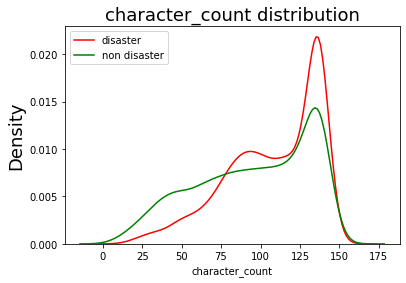

In [15]:
g = sns.distplot(train[train['target'] == 1]['character_count'], color = 'red', label = 'disaster', hist=False)
g = sns.distplot(train[train['target'] == 0]['character_count'], color = 'green', label = 'non disaster', hist=False)
g.set_title("character_count distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

In [16]:
#el character count de los disaster tweets parece ser mas alto
#los non disaster tienen una densidad mas alta solo hasta los 75 caracteres, de ahi en adelante la densidad de los disaster tweets es mayor


Text(0, 0.5, 'Density')

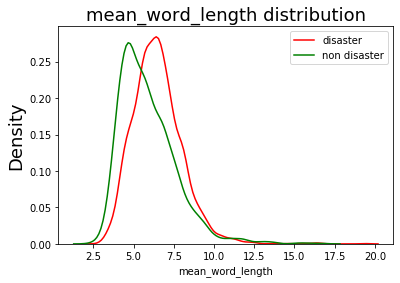

In [17]:
g = sns.distplot(train[train['target'] == 1]['mean_word_length'], color = 'red', label = 'disaster', hist=False)
g = sns.distplot(train[train['target'] == 0]['mean_word_length'], color = 'green', label = 'non disaster', hist=False)
g.set_title("mean_word_length distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

In [9]:
#Denuevo los disaster tweets tienen maor densidad en los valores mas altos (a partir del 6.0 aproximadamente)

Text(0, 0.5, 'Density')

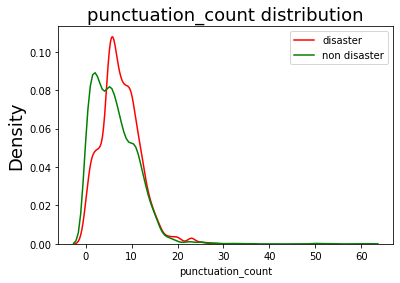

In [18]:
g = sns.distplot(train[train['target'] == 1]['punctuation_count'], color = 'red', label = 'disaster', hist=False)
g = sns.distplot(train[train['target'] == 0]['punctuation_count'], color = 'green', label = 'non disaster', hist=False)
g.set_title("punctuation_count distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

In [12]:
#nos encontramos con lo mismo, esta vez a partir del 7 aproximadamente

Text(0.5, 1.0, 'Mean Word Length vs. Punctuation Count')

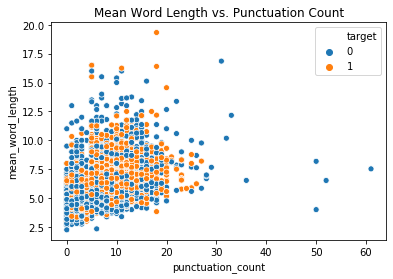

In [19]:
g = sns.scatterplot(x='punctuation_count', y='mean_word_length', data = train, hue= 'target')
g.set_title('Mean Word Length vs. Punctuation Count')

In [ ]:
#los disaster tweets se muestran mas acotados en los dos ejes, tienden a tener punctuation count maor a 5 y mean 
#word length mayor a 4 aproximadamente

#los non disaster parecen estar mas distribuidos pero lo que importa remarcar creo que es que los non disaster
#a valores mas bajos

Text(0.5, 1.0, 'Mean Word Length vs. Character Count')

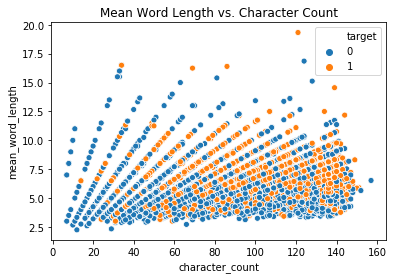

In [20]:
g = sns.scatterplot(x='character_count', y='mean_word_length', data = train, hue='target')
g.set_title('Mean Word Length vs. Character Count')

In [15]:
#en este se puede ver que los disaster tweets tienden a estar concentrados entre los 70 caracteres y los 140
#y desde los 5 mean_word_length hasta los 10

#mientras que los non disaster se muestran un poco mas distribuidos con respecto a la cantidad de caracteres y 
#tienden a tener un mean_word_length mas bajo, entre el 2.5 y el 5

#ademas se puede ver que se arma un patron lineal en determinadas partes del grafico, donde el character count parece aumentar con el mean_word_length



Text(0.5, 1.0, 'Character Count vs. Punctuation Count')

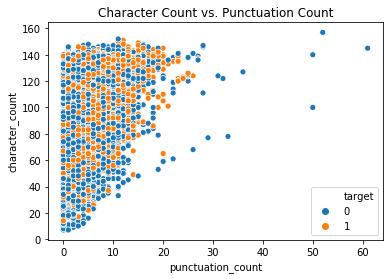

In [21]:
g = sns.scatterplot(x='punctuation_count', y='character_count', data = train, hue='target')
g.set_title('Character Count vs. Punctuation Count')

In [17]:
#Denuevo los non disaster tienden a valores mas bajos

In [23]:
grouped=train.groupby(['target'])#Calcular la mean character count

In [24]:
grouped=train.groupby(['target']).agg(['count'])
grouped = grouped[('id','count')].to_frame()
grouped.columns=['count']
grouped.head()

,count
target,
0,4307
1,3196


[Text(0.5, 1.0, 'target vs non target distribution')]

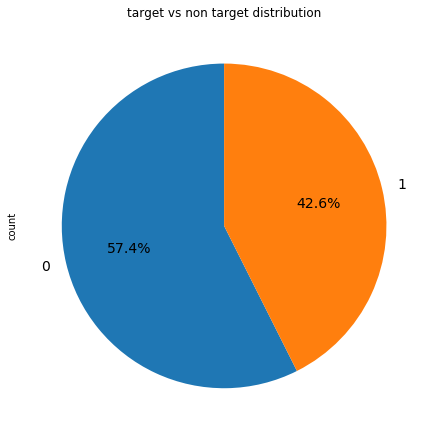

In [25]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
g = grouped.plot(kind='pie', y = 'count', ax = ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
ax1.set(title = 'target vs non target distribution')

In [39]:
train_MWL_lt_5 = train[train.mean_word_length < 5]
train_MWL_lt_5.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,4.384615,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,4.571429,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,4.500000,2
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,3.000000,4
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,4.300000,4


In [40]:
grouped=train_MWL_lt_5.groupby(['target']).agg(['count'])
grouped = grouped[('id','count')].to_frame()
grouped.columns=['count']
grouped.head()

,count
target,
0,1533
1,494


[Text(0.5, 1.0, 'target vs non target distribution(mean word length > 5)')]

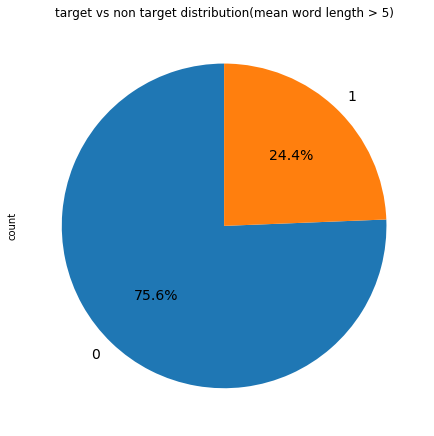

In [41]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
g = grouped.plot(kind='pie', y = 'count', ax = ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
ax1.set(title = 'target vs non target distribution(mean word length > 5)')

In [50]:
#el porcentaje de Disaster tweets disminuye significativamente

In [42]:
train_PC_lt_5 = train[train.punctuation_count < 5]
train_PC_lt_5.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,4.384615,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,4.571429,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,5.090909,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,7.125000,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,4.500000,2


In [44]:
grouped=train_PC_lt_5.groupby(['target']).agg(['count'])
grouped = grouped[('id','count')].to_frame()
grouped.columns=['count']
grouped.head()

,count
target,
0,1739
1,679


[Text(0.5, 1.0, 'target vs non target distribution(punctuation count > 5)')]

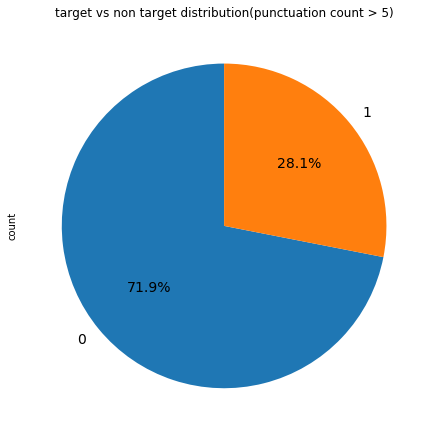

In [45]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
g = grouped.plot(kind='pie', y = 'count', ax = ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
ax1.set(title = 'target vs non target distribution(punctuation count > 5)')

In [ ]:
#nos encontramos con resultados mu parecidos

In [48]:
train_CC_lt_75 = train[train.character_count < 75]
train_CC_lt_75.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,4.384615,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,4.571429,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,7.125000,2
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,3.000000,4
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,4.300000,4


In [49]:
grouped=train_CC_lt_75.groupby(['target']).agg(['count'])
grouped = grouped[('id','count')].to_frame()
grouped.columns=['count']
grouped.head()

,count
target,
0,1282
1,447


[Text(0.5, 1.0, 'target vs non target distribution(character count > 75)')]

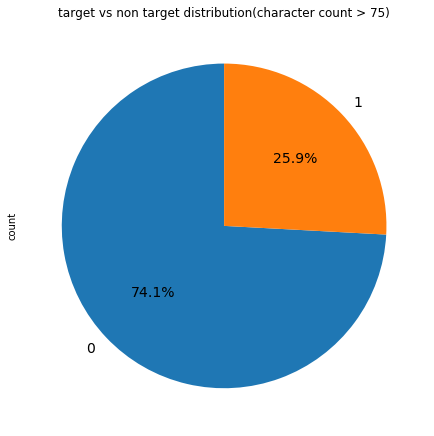

In [50]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
g = grouped.plot(kind='pie', y = 'count', ax = ax1, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
ax1.set(title = 'target vs non target distribution(character count > 75)')

In [ ]:
#esta vez el target sigue siendo menor pero igual tiene un aumento signiicativo
#se puede ineferir que a partir de cierta cantidad de valores en estas 3 columnas, las chances de que el tweet
#sea disaster aumentan

In [ ]:
fig, ax = plt.subplots(subplot_=)